# PS, Wii, Xbox: a consoles war, really?

## Load Data

In [8]:
# Import the relevant libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Let's load the video game sales data as "video" and explore the first 5 rows
video = pd.read_csv('/Users/m/Documents/Pycharm Projects/Video Game Sales Analysis/input/Video_Games_Sales_as_at_22_Dec_2016.csv')
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Get all Dataframe cols/raws counts
video.shape

(16719, 16)

In [10]:
#checking if there exists any nulls in the dataframe
video.isnull().any().any()

True

In [11]:
#getting rid of these pesky nulls via the "dropna" call
video = video.dropna(axis=0)

In [12]:
#Get DataFrame info
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [13]:
video.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

## Data exploration

lets plot some of the numeric features against each other to explore the relations between them as well as getting accustomed to using Seaborn's plotting *capabilities*. I therefore first plot the "**Critic_Score**" and "**User_Score**" columns as a jointplot (which is good to observe how two different variables are distributed) first to see how they interact

In [14]:
video['User_Score'] = video['User_Score'].convert_objects(convert_numeric= True)

/Users/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


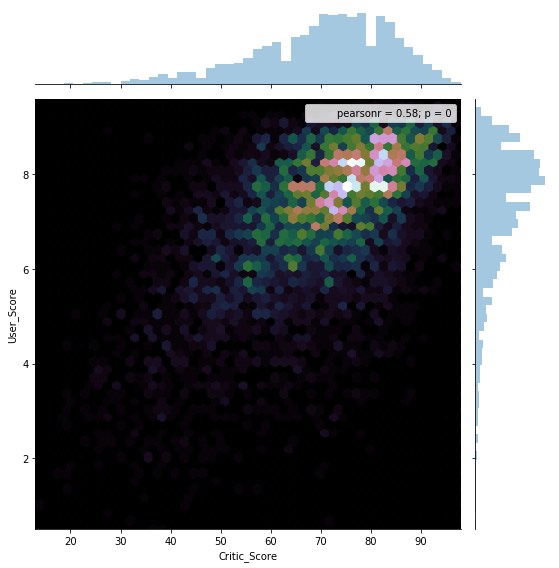

In [15]:
sns.jointplot(x='Critic_Score',y='User_Score',data=video,kind='hex', cmap= 'cubehelix', size=8)
#video.plot(y= 'Critic_Score', x ='User_Score',kind='hexbin',gridsize=35, sharex=False, colormap='afmhot_r', title='Hexbin of Critic_Score and User_Score')

As expected, these 2 scores exhibit quite positive Pearson Correlation with one another. This should not be a surprise as on average, if a game is good, both the critic and the user will derive enjoyment out of it and therefore tend to score the game higher and vice-versa. 

Let's now look at "**Critic_Count**" and "**Critic_Score**"

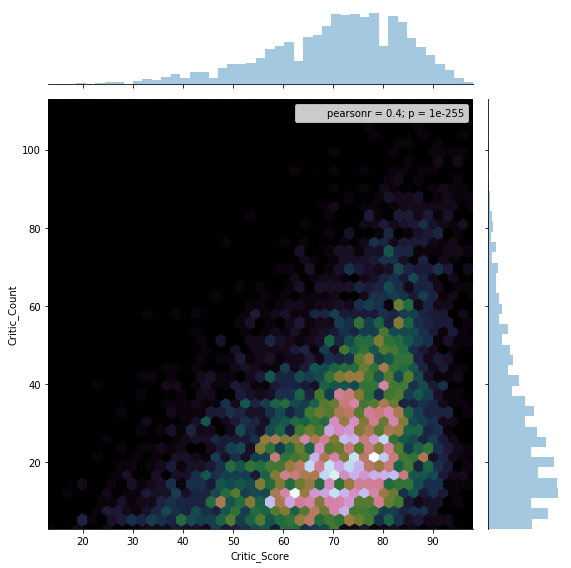

In [16]:
sns.jointplot('Critic_Score','Critic_Count',data=video,kind='hex', cmap='cubehelix', size=8)
#video.plot(y= 'Critic_Score', x ='Critic_Count',kind='hexbin',gridsize=40, sharex=False, colormap='cubehelix', title='Hexbin of Critic_Score and Critic_Count')

And finally, to inspect the correlations between all the numeric features and see how one feeds into the other, I shall plot another swanky heatmap. First I extract all the numeric columns into a list and create a simple dataframe "video_num" for this heatmap plotting as such

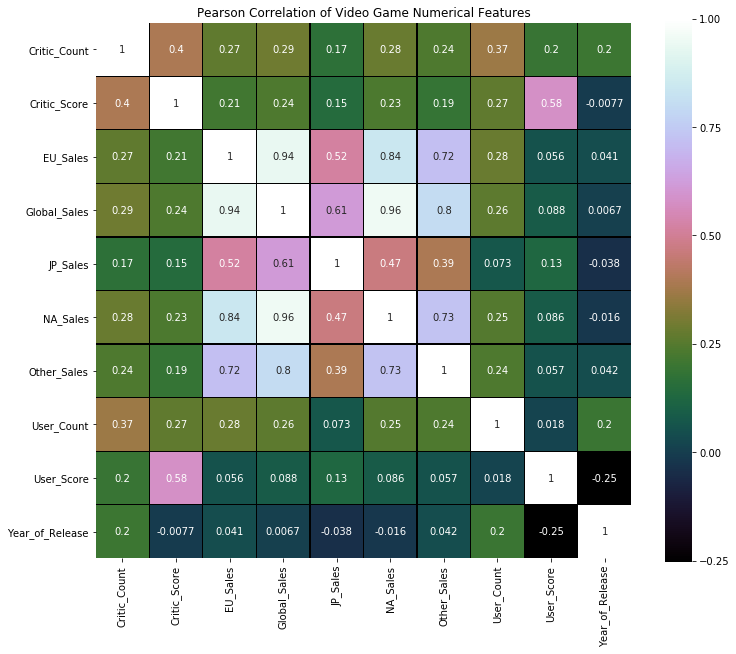

In [17]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in video.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = video.columns.difference(str_list) 
# Create Dataframe containing only numerical features
video_num = video[num_list]
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

With this heatmap, the darker colors represent more postive correlations and vice-versa. Therefore, we can already see quite logical connections like "Global_Sales" being very positively correlated to "EU_Sales" etc. Just some interesting things so far.

## PS3 vs XBOX360 vs Wii

In [18]:
video7th = video[(video['Platform'] == 'Wii') | (video['Platform'] == 'PS3') | (video['Platform'] == 'X360')]
video7th.shape

(2106, 16)

### Global sales over the years

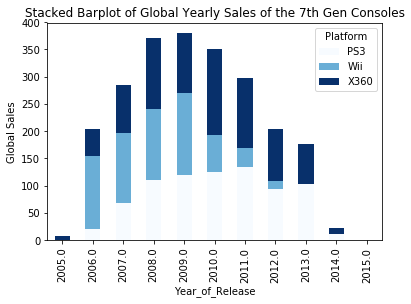

In [19]:
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

### Sales aggregated by video game ratings

Here, I will take a look at the different video game ratings (i think its E : Everyone, M: Mature, T: Teens) and look at how many sales each of the 3 consoles made


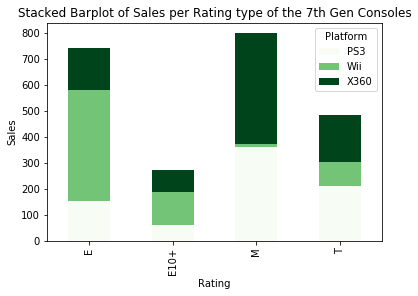

In [20]:
ratingSales = video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

### Sales by genre

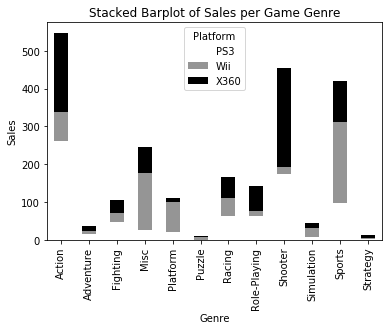

In [21]:
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

### Total sales and total users

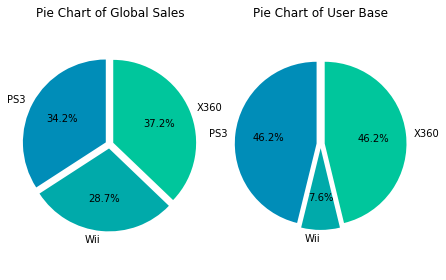

In [22]:
# Plotting our pie charts
# Create a list of colors 
colors = ['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

## PS4 vs XBOXONE vs WiiU

In [23]:
video8th = video[(video['Platform'] == 'WiiU') | (video['Platform'] == 'PS4') | (video['Platform'] == 'XOne')]
video8th.shape

(487, 16)

### Global sales over the years

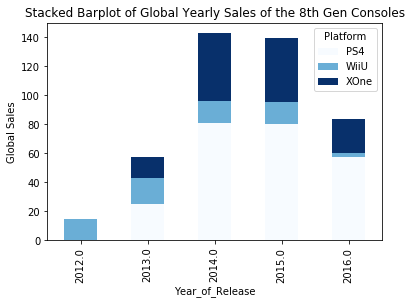

In [24]:
yearlySales = video8th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 8th Gen Consoles')
plt.ylabel('Global Sales')

### Sales aggregated by video game ratings

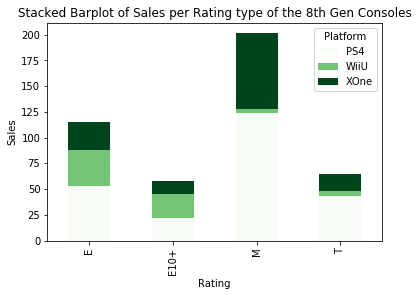

In [25]:
ratingSales = video8th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 8th Gen Consoles')
plt.ylabel('Sales')

### Sales by genre

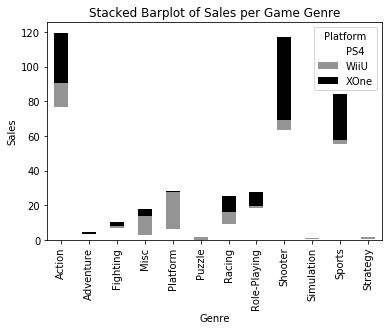

In [26]:
genreSales = video8th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

### Total sales and total users

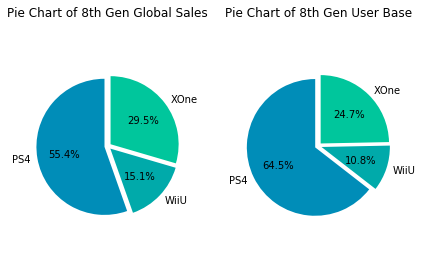

In [27]:
# Plotting our pie charts
# Create a list of colors 
colors = ['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
   video8th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video8th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen Global Sales')
plt.subplot(122)
plt.pie(
   video8th.groupby('Platform').User_Count.sum(),
    labels=video8th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen User Base')
plt.tight_layout()
plt.show()